# Case Study 3 : Analyzing data from MovieLens

**Due Date: Due Date: March 13, 2024 by 5:59pm**


## The MovieLens data sets


http://grouplens.org/datasets/movielens/



In [ ]:
from IPython.lib.displaysplay import YouTubeVideo

In [ ]:
YouTubeVideo('4tW9HY0Q460')

**TEAM Members:** 

    1. Nicholas Blank
    
    2. Dan Nguyen
    
    3. Phong Cao
    
    4. Duyen Le
    
    5. Kathleen Wang
 
 **Give your group a name**. 
 
     Perry the Platypus

**Desired outcome of the case study.**
* In this case study we will look at the MovieLens 1M Data Set.
    * It contains data about users and how they rate movies.
* The idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Required Readings:** 
* Chapter 2 (only the section on the MovieLens 1M Data Set), Chapter 5, Chapter 6,
and Chapter 8 of the book [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do)  (available from the WPI library as an e-book).
* If you want your code to be really compact then you might want to also look into the pivot_table method of Panda's DataFrame, though there are many other ways to complete the case study!




# Problem 1 (20 points total): 

## (10 points) Importing the MovieLens data set and merging it into a single Pandas DataFrame

* Download the 1 million ratings data set from http://grouplens.org/datasets/movielens/ (though if you are feeling adventerous you can download the 10 million ratings file instead)
* Merge all of the data into a single Pandas DataFrame
* Store the data into an HDF5 file.

## (10 points) Report some basic details of the data you collected.  For example:

*  How many movies have an average rating over 4.5 overall?
*  How many movies have an average rating over 4.5 among men?  How about women?
*  How many movies have an *median* rating over 4.5 among men over age 30?  How about women over age 30?
*  What are the ten most popular movies?
    * Choose what you consider to be a reasonable defintion of "popular".
    * Be perpared to defend this choice.
*  Make some conjectures about how easy various groups are to please? Support your answers with data!  
    *  For example, one might conjecture that people between the ages of 1 and 10 are the easiest to please since they are all young children.  This conjecture may or may not be true, but how would you support or disprove either conclusion with with data?
    *  Be sure to come up with your own conjectures and support them with data!


In [44]:
import pandas as pd
import matplotlib as plt
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------

# Getting data
# import csv files to separate dataframes
df_m = pd.read_csv('movies.dat', delimiter='::', engine='python', header=None, 
                   names=['MovieID','Title','Genres'])

df_r = pd.read_csv('ratings.dat', delimiter='::',engine='python', header=None, 
                   names=['UserID','MovieID','Rating','Timestamp'])

df_u = pd.read_csv('users.dat', delimiter='::',engine='python', header=None, 
                   names=['UserID','Gender','Age','Occupation','Zip-code'])

# Dataframes columns and shape
print("Movies : ", df_m.columns.values, " ", df_m.shape)
print("Ratings: ", df_r.columns.values, " ", df_r.shape)
print("Users  : ", df_u.columns.values, " ", df_u.shape)

Movies :  ['MovieID' 'Title' 'Genres']   (3883, 3)
Ratings:  ['UserID' 'MovieID' 'Rating' 'Timestamp']   (1000209, 4)
Users  :  ['UserID' 'Gender' 'Age' 'Occupation' 'Zip-code']   (6040, 5)


In [45]:
# Merging data

# Merge movies + ratings on inner
df = df_m.merge(df_r, on = "MovieID", how = "inner")
# Merge movies + ratings + userid on inner
df = df.merge(df_u, on  = "UserID", how = "inner")

print("Final Dataframe: ", df.columns.values, df.shape)

Final Dataframe:  ['MovieID' 'Title' 'Genres' 'UserID' 'Rating' 'Timestamp' 'Gender' 'Age'
 'Occupation' 'Zip-code'] (1000209, 10)


In [46]:
# Save data into HDF5 file
df.to_hdf('data.h5', key='df_key', mode='w')

In [47]:
# How many movies have an average rating over 4.5 overall?
q1 = df.groupby("MovieID", as_index=False)["Rating"].agg("mean")
ans1 = q1[(q1["Rating"] > 4.5)]
ans1 = len(ans1)

In [48]:
# How many movies have an average rating over 4.5 among men? How about women?

# Group by and agg
q2 = df.groupby(["MovieID", "Gender"])["Rating"].agg("mean")
q2 = q2.reset_index(level = ["MovieID", "Gender"])

# For men
q2_men = q2[(q2["Gender"] == "M")]
q2_men = q2_men[(q2_men["Rating"] > 4.5)]
ans2a = len(q2_men)

# For women
q2_women = q2[(q2["Gender"] == "F")]
q2_women = q2_women[(q2_women["Rating"] > 4.5)]
ans2b = len(q2_women)

In [49]:
# How many movies have an median rating over 4.5 among men over age 30? How about women over age 30?
q3 = df[(df["Age"] > 30)]
q3_m = q3[(q3["Gender"] == "M")]
q3_w = q3[(q3["Gender"] == "F")]

# For men
q3_m = q3_m.groupby("MovieID")["Rating"].agg("median")
q3_m = q3_m[(q3_m > 4.5)]

# For women
q3_w = q3_w.groupby("MovieID")["Rating"].agg("median")
q3_w = q3_w[(q3_w > 4.5)]

ans3a = len(q3_m)
ans3b = len(q3_w)

In [50]:
# Answer for problem 1:
print('1.   How many movies have an average rating > 4.5? ', ans1)
print('2a.  How many movies have an average rating > 4.5 among men? ', ans2a)
print('2b.  How many movies have an average rating > 4.5 among women? ', ans2b)
print('3a.  How many movies have a median rating > 4.5 among men over 30? ', ans3a)
print('3b.  How many movies have a median rating > 4.5 among women over 30? ', ans3b)

1.   How many movies have an average rating > 4.5?  21
2a.  How many movies have an average rating > 4.5 among men?  23
2b.  How many movies have an average rating > 4.5 among women?  51
3a.  How many movies have a median rating > 4.5 among men over 30?  86
3b.  How many movies have a median rating > 4.5 among women over 30?  149


In [51]:
# Top 10 most popular movies
#  => 10 movies with the most reviews (ratings)

# i) Top 10 movies in all gender
print("Top 10 movies for all")
top10 = df.groupby(["Title"])["Rating"].count().sort_values(ascending = False).head(10)
print(top10) 
print("-------------------------------------------------------------")

# ii) Top 10 movies for male
print("Top 10 movies for men")
top_m = df[(df["Gender"] == "M")]
top_m = top_m.groupby(["Title"])["Rating"].count().sort_values(ascending = False).head(10)
print(top_m)
print("-------------------------------------------------------------")

# iii) Top 10 movies for femal
print("Top 10 movies for women")
top_f = df[(df["Gender"] == "F")]
top_f = top_f.groupby(["Title"])["Rating"].count().sort_values(ascending = False).head(10)
print(top_f)

Top 10 movies for all
Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Name: Rating, dtype: int64
-------------------------------------------------------------
Top 10 movies for men
Title
American Beauty (1999)                                   2482
Star Wars: Episode IV - A New Hope (1977)                2344
Star Wars: Episode V - The Empire Strikes Back (1980)    2342
Star Wars: Episode VI - Return of the Jedi (1983)

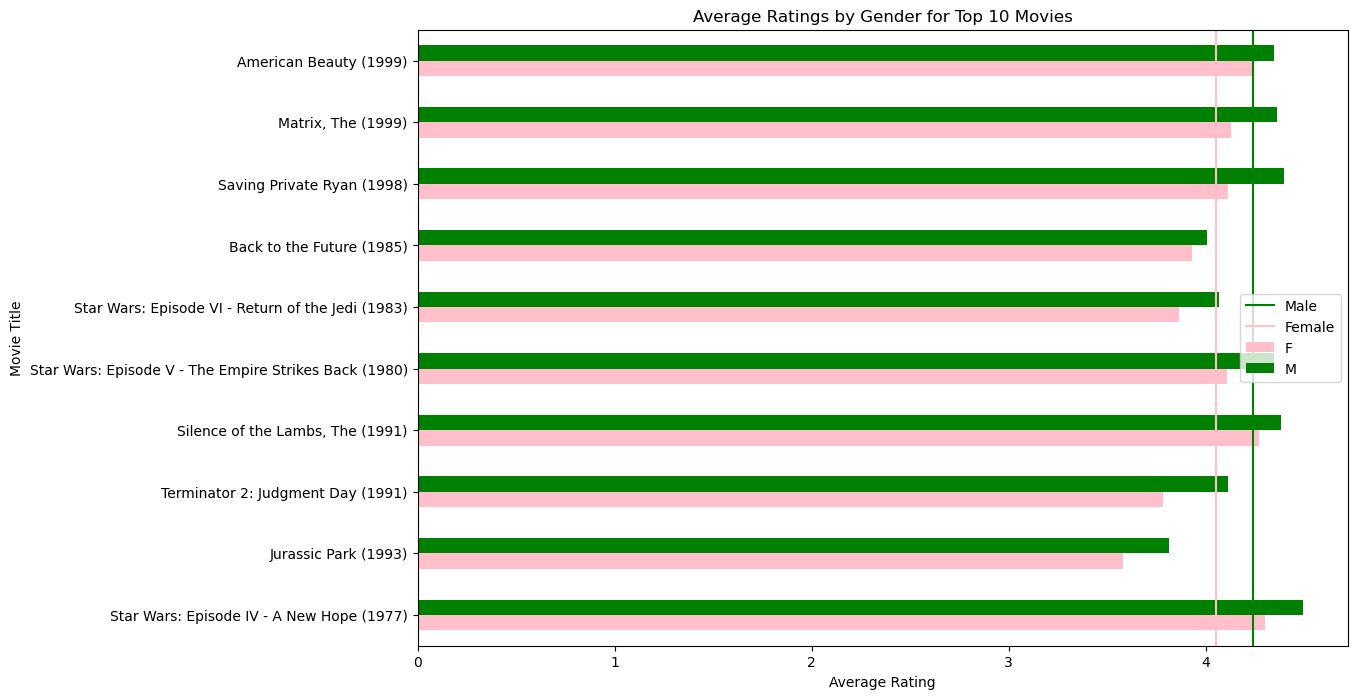

In [52]:
# Make some conjectures about how easy various groups are to please? Support your answers with data!
    # For example, one might conjecture that people between the ages of 1 and 10 are the easiest 
    # to please since they are all young children. This conjecture may or may not be true, 
    # but how would you support or disprove either conclusion with with data?
    
    # Be sure to come up with your own conjectures and support them with data!
    
# Conjecture 1a: Male viewers are easier to please than female viewers in top 10 movies.
import matplotlib.pyplot as plt

# Average ratings of 10 most popular movies
top_10_most_rated_movies = df['MovieID'].value_counts().nlargest(10).index
top_10_most_rated_movies = top_10_most_rated_movies.sort_values(ascending = True)  
    
top_10_data = df[df['MovieID'].isin(top_10_most_rated_movies)]

# ratings by gender
average_ratings_by_gender_top_10 = top_10_data.groupby(['MovieID', 'Gender'])['Rating'].mean().unstack()

# avergae rating of top 10 by gender
average_ratings_by_gender_top_10_all = top_10_data.groupby('Gender')['Rating'].mean()
ax = average_ratings_by_gender_top_10.plot(kind='barh', figsize=(12, 8), color=['pink', 'green'])
plt.axvline(x=average_ratings_by_gender_top_10_all['M'], color='green', linestyle='-', label='Male')
plt.axvline(x=average_ratings_by_gender_top_10_all['F'], color='pink', linestyle='-', label='Female')

plt.yticks(range(len(top_10_most_rated_movies)), [df[df['MovieID'] == MovieID]['Title'].iloc[0] for MovieID in top_10_most_rated_movies])

plt.title('Average Ratings by Gender for Top 10 Movies')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.legend()

plt.show()

Average rating of age <18
Mean   :  3.549520414538238
Median :  4.0

Average rating of age 18-24
Mean   :  3.5075734460814227
Median :  4.0

Average rating of age 25-34
Mean   :  3.5452350615336385
Median :  4.0

Average rating of age 35-44
Mean   :  3.6181615352532375
Median :  4.0

Average rating of age 45-49
Mean   :  3.638061530735475
Median :  4.0

Average rating of age 50-55
Mean   :  3.714512346530556
Median :  4.0

Average rating of age 56+
Mean   :  3.766632284682826
Median :  4.0
Conclusion
The trend is since the age of 18 above, the older group tend to have a higher rating
People at the age 56+ is the easiest
People tend to rating a movie 4 stars


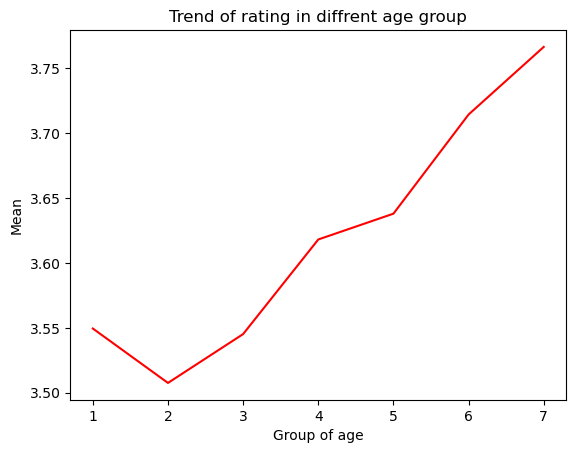

In [53]:
# Conjector 1b) People in all age groups tend to rate a movie with 4 star
# Conjector 1c) The trend is since the age of 18 above, the older group tend to have a higher rating

import matplotlib.pyplot as plt    
    
# Rating of group 1 which the age is under 18
group1 = df[(df["Age"] == 1)]
group1_mean = group1["Rating"].agg("mean")
group1_median = group1["Rating"].agg("median")
print("Average rating of age <18")
print("Mean   : ", group1_mean)
print("Median : ", group1_median)
print()

# Rating of group 2 which the age is from 18-24
group2 = df[(df["Age"] == 18)]
group2_mean = group2["Rating"].agg("mean")
group2_median = group2["Rating"].agg("median")
print("Average rating of age 18-24")
print("Mean   : ", group2_mean)
print("Median : ", group2_median)
print()

# Rating of group 3 which the age is from 25-34
group3 = df[(df["Age"] == 25)]
group3_mean = group3["Rating"].agg("mean")
group3_median = group3["Rating"].agg("median")
print("Average rating of age 25-34")
print("Mean   : ", group3_mean)
print("Median : ", group3_median)
print()

# Rating of group 4 which the age is from 35-44
group4 = df[(df["Age"] == 35)]
group4_mean = group4["Rating"].agg("mean")
group4_median = group4["Rating"].agg("median")
print("Average rating of age 35-44")
print("Mean   : ", group4_mean)
print("Median : ", group4_median)
print()


# Rating of group 5 which the age is from 45-49
group5 = df[(df["Age"] == 45)]
group5_mean = group5["Rating"].agg("mean")
group5_median = group5["Rating"].agg("median")
print("Average rating of age 45-49")
print("Mean   : ", group5_mean)
print("Median : ", group5_median)
print()


# Rating of group 6 which the age is from 50-55
group6 = df[(df["Age"] == 50)]
group6_mean = group6["Rating"].agg("mean")
group6_median = group6["Rating"].agg("median")
print("Average rating of age 50-55")
print("Mean   : ", group6_mean)
print("Median : ", group6_median)
print()

# Rating of group 7 which the age is 56+
group7 = df[(df["Age"] == 56)]
group7_mean = group7["Rating"].agg("mean")
group7_median = group7["Rating"].agg("median")
print("Average rating of age 56+")
print("Mean   : ", group7_mean)
print("Median : ", group7_median)

# Plotting
x = [1, 2, 3, 4, 5, 6, 7]
y = [group1_mean, group2_mean, group3_mean, group4_mean, group5_mean, group6_mean, group7_mean]
plt.title("Trend of rating in diffrent age group")
plt.xlabel("Group of age") 
plt.ylabel("Mean") 
plt.plot(x, y, color = "red")
plt.show

# =>> Conclusion
print("Conclusion")
print("The trend is since the age of 18 above, the older group tend to have a higher rating")
print("People at the age 56+ is the easiest")
print("People tend to rating a movie 4 stars")


Age
25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: count, dtype: int64


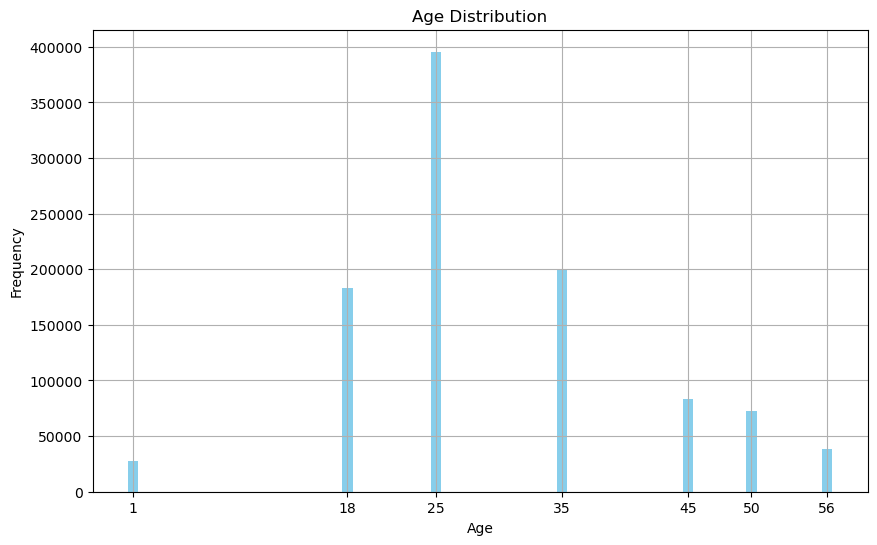

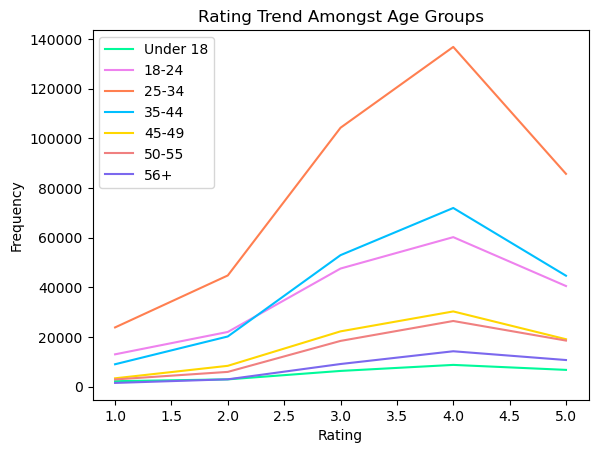

In [54]:
age_counts = df['Age'].value_counts()
print(age_counts)

# Plot age distribution
ticks = [1,18,25,35,45,50,56]
plt.figure(figsize=(10, 6))
plt.bar(age_counts.index, age_counts.values, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(ticks)
plt.show()

# Rating of group 1 which the age is under 18
group1 = df[(df["Age"] == 1)]
averageCount1 = group1["Rating"].value_counts(sort = False).sort_index()
df_averageCount1 = pd.DataFrame(averageCount1)
plt.plot(df_averageCount1.index, df_averageCount1["count"], label = "Under 18", color ="mediumspringgreen")

# Rating of group 2 which the age is from 18-24
group2 = df[(df["Age"] == 18)]
averageCount2 = group2["Rating"].value_counts(sort = False).sort_index()
df_averageCount2 = pd.DataFrame(averageCount2)
plt.plot(df_averageCount2.index, df_averageCount2["count"], label = "18-24", color ="violet")

# Rating of group 3 which the age is from 25-34
group3 = df[(df["Age"] == 25)]
averageCount3 = group3["Rating"].value_counts(sort = False).sort_index()
df_averageCount3 = pd.DataFrame(averageCount3)
plt.plot(df_averageCount3.index, df_averageCount3["count"], label = "25-34", color ="coral")

# Rating of group 4 which the age is from 35-44
group4 = df[(df["Age"] == 35)]
averageCount4 = group4["Rating"].value_counts(sort = False).sort_index()
df_averageCount4 = pd.DataFrame(averageCount4)
plt.plot(df_averageCount4.index, df_averageCount4["count"], label = "35-44", color ="deepskyblue")

# Rating of group 5 which the age is from 45-49
group5 = df[(df["Age"] == 45)]
averageCount5 = group5["Rating"].value_counts(sort = False).sort_index()
df_averageCount5 = pd.DataFrame(averageCount5)
plt.plot(df_averageCount5.index, df_averageCount5["count"], label = "45-49", color ="gold")

# Rating of group 6 which the age is from 50-55
group6 = df[(df["Age"] == 50)]
averageCount6 = group6["Rating"].value_counts(sort = False).sort_index()
df_averageCount6 = pd.DataFrame(averageCount6)
plt.plot(df_averageCount6.index, df_averageCount6["count"], label = "50-55", color ="lightcoral")

# Rating of group 7 which the age is 56+
group7 = df[(df["Age"] == 56)]
averageCount7 = group7["Rating"].value_counts(sort = False).sort_index()
df_averageCount7 = pd.DataFrame(averageCount7)
plt.plot(df_averageCount7.index, df_averageCount7["count"], label = "56+", color ="mediumslateblue")

plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating Trend Amongst Age Groups')
leg = plt.legend(loc='upper left')


In [ ]:
# From the second plot, we can conclude every age groups tend to rate a movie at 4 stars
# Watching movies is most popular in the age 25-34

# Problem 2 (20 points total): Expand our investigation to histograms

**An obvious issue with any inferences drawn from Problem 1 is that we did not consider how many times a movie was rated.** 
* (2 points) Plot a histogram of the ratings of all movies.
* (2 points) Plot a histogram of the *number* of ratings each movie recieved.
* (2 points) Plot a histogram of the *average rating* for each movie.
* (6 points) Plot a histogram of the *average rating* for movies which are rated more than 100 times.
    * What do you observe about the tails of the histogram where you use all the movies versus the one where you only use movies rated more than 100 times?
    * Which highly rated movies would you trust are actually good?  Those rated more than 100 times or those rated less than 100 times?
* (8 points) Make some conjectures about the distribution of ratings? Support your answers with data!  
    *  For example, what age range do you think has more extreme ratings?  Do you think children are more or less likely to rate a movie 1 or 5?
    *  Be sure to come up with your own conjectures and support them with data!

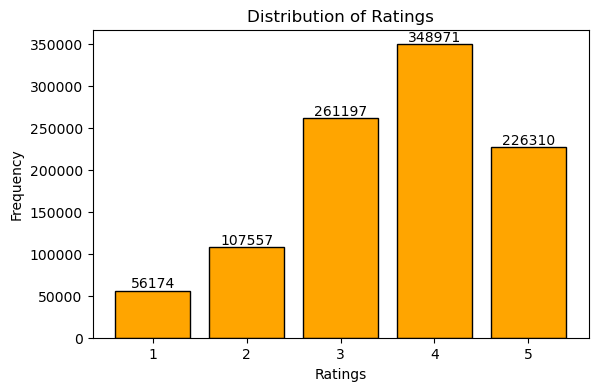

In [55]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------

# Plot a histogram of the ratings of all movies
r_cnt = df['Rating']
r_cnt = r_cnt.value_counts()
r_cnt = r_cnt.sort_index()
idx = r_cnt.index

plt.figure().set_figheight(4)
plt.bar(idx, r_cnt, edgecolor='black', color = "orange")
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')


for i, count in enumerate(r_cnt):
    plt.text(i + 1, count, str(count), ha='center', va='bottom')

plt.show()

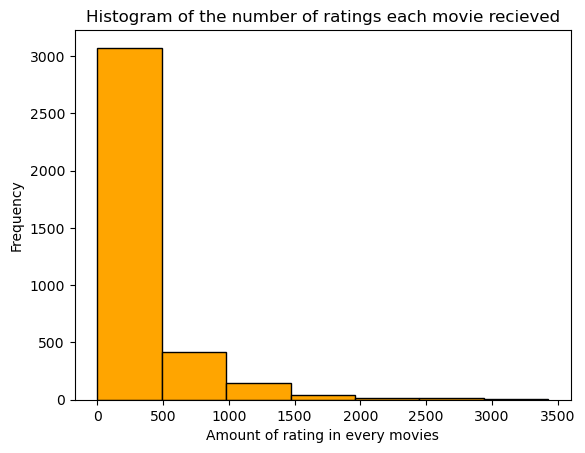

In [56]:
# Plot a histogram of the number of ratings each movie recieved.
his2 = df.groupby(["MovieID"])["Rating"].agg("count")
his2 = his2.plot.hist(bins = 7, xlabel = "Amount of rating in every movies", ylabel = "Frequency", 
                      color = "orange", edgecolor = "black",
                     title = "Histogram of the number of ratings each movie recieved")

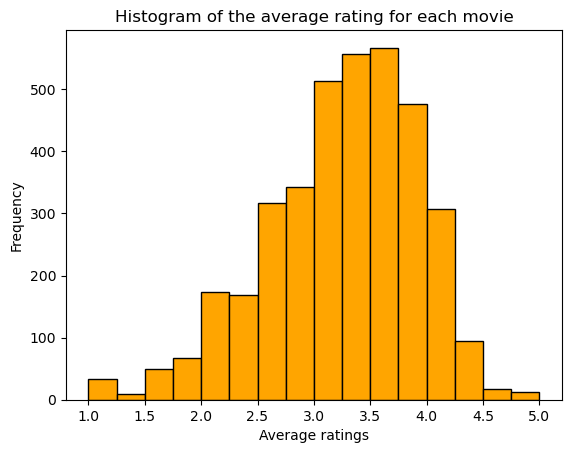

In [57]:
# Plot a histogram of the average rating for each movie.
his3 = df.groupby(["MovieID"])["Rating"].agg("mean")
his3 = his3.plot.hist(bins = 16, xlabel = "Average ratings", 
                      ylabel = "Frequency", color = "orange", edgecolor = "black",
                     title = "Histogram of the average rating for each movie")

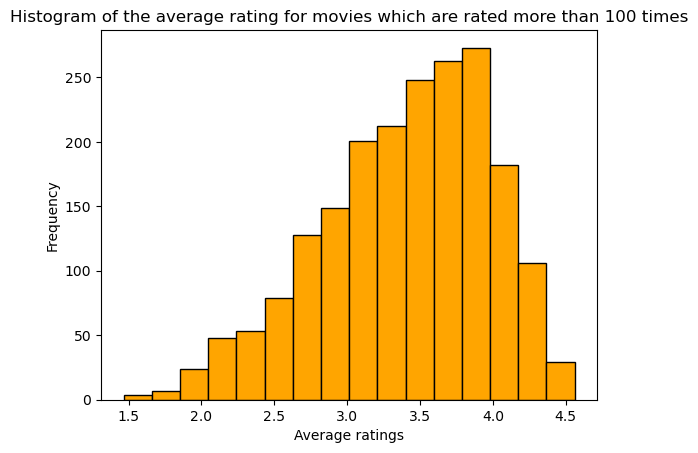

In [58]:
# Plot a histogram of the average rating for movies which are rated more than 100 times.
his4 = df.groupby(["MovieID"])["Rating"].agg(["mean", "count"])
his4 = his4[(his4["count"] > 100)]
his4 = his4["mean"]
his4 = his4.plot.hist(bins = 16, xlabel = "Average ratings", 
                      ylabel = "Frequency", color = "orange", 
                      edgecolor = "black",  
                      title = "Histogram of the average rating for movies which are rated more than 100 times")

In [59]:
# What do you observe about the tails of the histogram where you use all the movies 
    # versus the one where you only use movies rated more than 100 times?
# Which highly rated movies would you trust are actually good?
    # Those rated more than 100 times or those rated less than 100 times?

# Both histograms have skewed left distribution. However, the tail of the histogram for all movies
    # is shorter than that of the histogram for movies with more than 100 ratings. This means that
    # the average ratings of all movies is smaller than that of movies with more than 100 ratings
# I would trust the higly rated movies with more than 100 ratings. Based on the previous conclusion,
    # movies with less than 100 ratings must tend to have smaller average ratings than all movies.

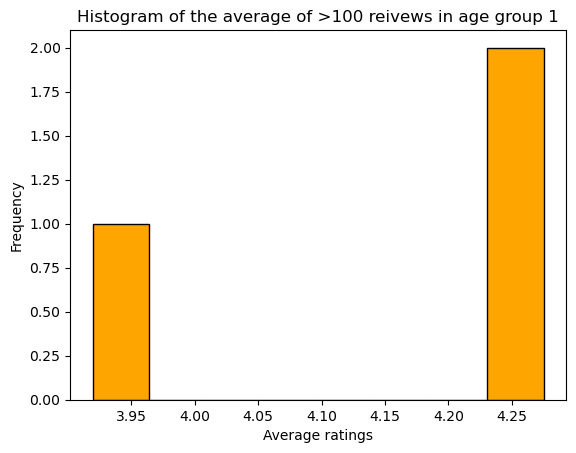

In [60]:
# Conjector 2a) The variance of distribution of >100 review is less than all

# Up to 100 reviews
def histogram_age (df, age):
    his = df[(df["Age"] == age)]
    his = his.groupby(["MovieID"])["Rating"].agg(["mean", "count"])
    his = his[(his["count"] > 100)]
    his = his["mean"]
    his = his.plot.hist(bins = 8, xlabel = "Average ratings", 
                          ylabel = "Frequency", color = "orange", 
                          edgecolor = "black",  
                          title = f"Histogram of the average of >100 reivews in age group {age}")
histogram_age(df, 1)

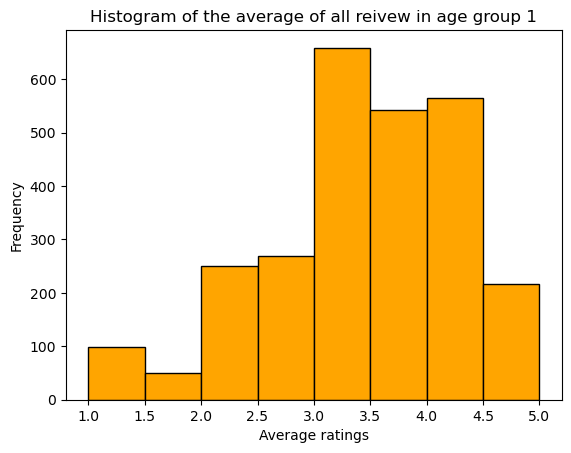

In [61]:
# All reviews
def histogram_age_all (df, age):
    his = df[(df["Age"] == age)]
    his = his.groupby(["MovieID"])["Rating"].agg(["mean", "count"])
    his = his["mean"]
    his = his.plot.hist(bins = 8, xlabel = "Average ratings", 
                          ylabel = "Frequency", color = "orange", 
                          edgecolor = "black",  
                          title = f"Histogram of the average of all reivew in age group {age}")
histogram_age_all(df, 1)

<function matplotlib.pyplot.show(close=None, block=None)>

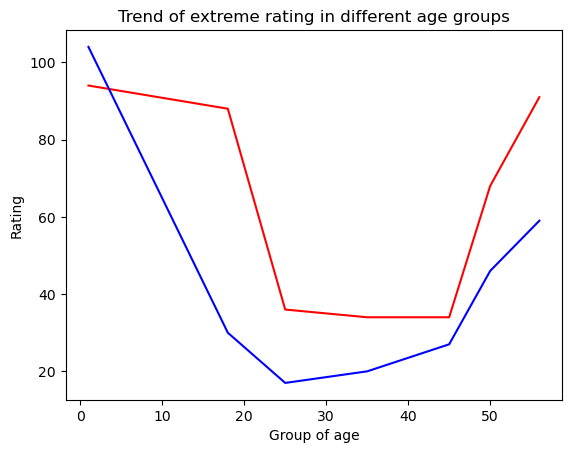

In [62]:
# Conjector 2b) People under 18 tend to have more extreme rating
# Conjector 2c) People tend to rate a movie one over rate a movie five

import matplotlib.pyplot as plt
def take_average(df, age):
    df = df[(df["Age"] == age)]
    df = df.groupby("MovieID")["Rating"].agg("mean")
    one = df[(df == 1)]
    five = df[(df == 5)]
    all_one.append(len(one))
    all_five.append(len(five))
    
all_one = []
all_five = []
take_average(df, 1)
take_average(df, 18)
take_average(df, 25)
take_average(df, 35)
take_average(df, 45)
take_average(df, 50)
take_average(df, 56)
y = [1, 18, 25, 35, 45, 50, 56]

plt.title("Trend of extreme rating in different age groups")
plt.xlabel("Group of age") 
plt.ylabel("Rating") 
plt.plot(y, all_one, color = "red")
plt.plot(y, all_five, color = "blue")
plt.show

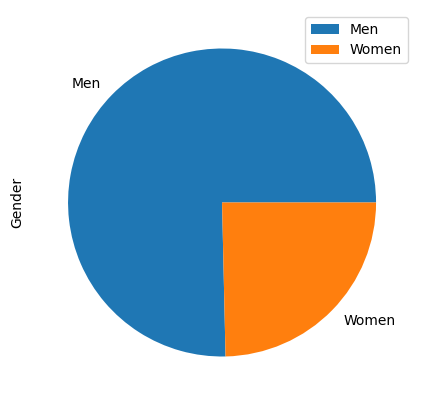

In [63]:
# Bias in this dataset

num_m = len(df[(df["Gender"] == "M")])
num_w = len(df[(df["Gender"] == "F")])
total = len(df)
df_mw = pd.DataFrame({"Gender": [num_m, num_w]},
                    index = ["Men", "Women"])
plot = df_mw.plot.pie(y = "Gender", figsize=(5,5))

*------------------------

# Problem 3: (20 points total)
## Correlation:  Men versus women

Let look more closely at the relationship between the pieces of data we have.

* (2 points) Make a scatter plot of men versus women and their mean rating for every movie.
* (2 points) Make a scatter plot of men versus women and their mean rating for movies rated more than 200 times.
* (6 points) Compute the *correlation coefficent* between the ratings of men and women.
    * What do you observe?
    * Are the ratings similiar or not? Support your answer with data!
* (10 points) Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender.
    * For example, are men and women more similar when they are younger or older?
    * Be sure to come up with your own conjectures and support them with data!

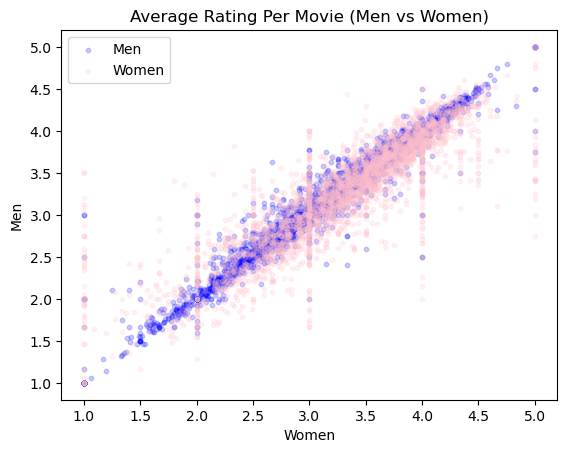

In [64]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

review = df.pivot_table(values='Rating', index='MovieID', columns='Gender', aggfunc='mean')

x_men = review["M"]
x_women = review["F"]
y = df.pivot_table(values='Rating', index='MovieID', aggfunc='mean')

plt.scatter(x_men, y, c="blue", s=10, alpha=0.2, label="Men")
plt.scatter(x_women, y, c="pink", s=10, alpha=0.2, label="Women")

plt.title("Average Rating Per Movie (Men vs Women)")
plt.xlabel("Women")
plt.ylabel("Men")
plt.legend() 
plt.show()

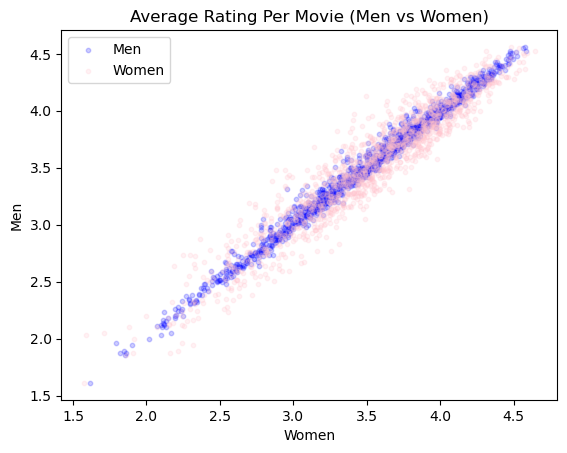

In [65]:
# Make a scatter plot of men versus women and their mean rating for movies rated more than 200 times.

movie_ratings_counts = df['MovieID'].value_counts()
popular_movie_ids = movie_ratings_counts[movie_ratings_counts > 200].index
df_mru_filtered = df[df['MovieID'].isin(popular_movie_ids)]

# Create a pivot table
review = df_mru_filtered.pivot_table(values='Rating', index='MovieID', columns='Gender', aggfunc='mean')

x_men = review["M"]
x_women = review["F"]
y = df_mru_filtered.pivot_table(values='Rating', index='MovieID', aggfunc='mean')

# Scatter plot
plt.scatter(x_men, y, c="blue", s=10, alpha=0.2, label="Men")
plt.scatter(x_women, y, c="pink", s=10, alpha=0.2, label="Women")

plt.title("Average Rating Per Movie (Men vs Women)")
plt.xlabel("Women")
plt.ylabel("Men")
plt.legend() 
plt.show()

Correlation Coefficient between Men and Women Ratings: 0.9183613857026666
There appears to be a relatively strong positive correlation.
            F         M  difference
Age                                
1    3.616291  3.517461    0.098830
18   3.453145  3.525476   -0.072332
25   3.606700  3.526780    0.079920
35   3.659653  3.604434    0.055219
45   3.663044  3.627942    0.035102
50   3.797110  3.687098    0.110012
56   3.915534  3.720327    0.195207


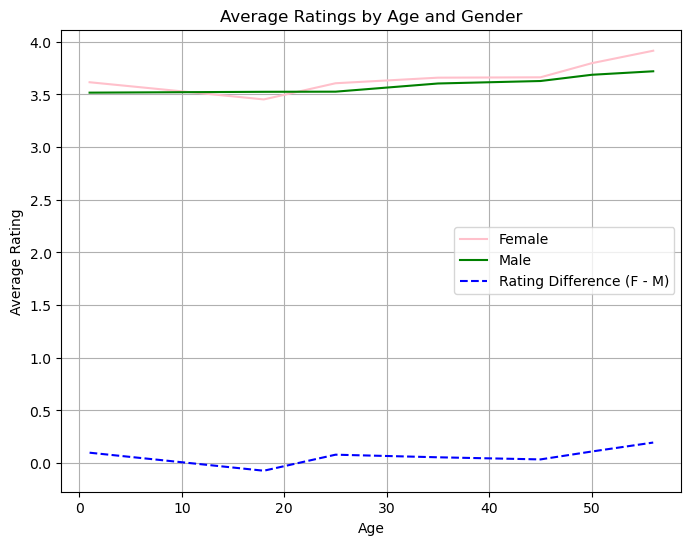

The ratings appear to be almost the same


In [66]:
# Create a pivot table for Men and Women ratings
df_gender = df.pivot_table(values='Rating', index='MovieID', columns='Gender', aggfunc='mean')

# Compute the correlation coefficient
corr_coef = review['M'].corr(review['F'])

print(f"Correlation Coefficient between Men and Women Ratings: {corr_coef}")
print(f"There appears to be a relatively strong positive correlation.")

avg_ratings = df.groupby(['Age', 'Gender'])['Rating'].mean().unstack()

plt.figure(figsize=(8, 6))
plt.plot(avg_ratings.index, avg_ratings['F'], color='pink', label='Female')
plt.plot(avg_ratings.index, avg_ratings['M'], color='green', label='Male')
rating_difference = avg_ratings['F'] - avg_ratings['M']
plt.plot(rating_difference, color='blue', label='Rating Difference (F - M)', linestyle='--')


combined_data = pd.concat([avg_ratings, rating_difference.rename('difference')], axis=1)
print(combined_data)
plt.title('Average Ratings by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Average Rating')
plt.legend()
plt.grid(True)
plt.show()

print(f"The ratings appear to be almost the same")

In [67]:
# Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender.
    # For example, are men and women more similar when they are younger or older?
    # Be sure to come up with your own conjectures and support them with data!

# Conjecture 3a) Correlation between Male and Female for different Age groups

review_age = df.pivot_table(
    values='Rating', 
    index=['MovieID', 'Age'], 
    columns='Gender', 
    aggfunc='mean')

review_age = review_age.dropna()

corr_coef_age = review_age.groupby(['Age']).apply(lambda x: x['M'].corr(x['F']))
corr_coef_age = corr_coef_age.reset_index(name='Corr_Coef')
corr_coef_age = corr_coef_age.sort_values(by='Corr_Coef', ascending=False)

print("Correlation Coefficients between Men and Women Ratings for different Age groups\n")
print(corr_coef_age)
print("\nThere isn't as high a correlation for individual age groups as there are between men and women as a whole.")
print("There is still a positive correlation between men and women for all age groups, particularly 25-34.")

Correlation Coefficients between Men and Women Ratings for different Age groups

   Age  Corr_Coef
2   25   0.686293
3   35   0.599398
1   18   0.575622
4   45   0.568988
5   50   0.536948
6   56   0.413094
0    1   0.347884

There isn't as high a correlation for individual age groups as there are between men and women as a whole.
There is still a positive correlation between men and women for all age groups, particularly 25-34.


In [68]:
# create dataframe with job titles

jobs = {
    "JobTitle": [
        "other or not specified",
        "academic/educator",
        "artist",
        "clerical/admin",
        "college/grad student",
        "customer service",
        "doctor/health care",
        "executive/managerial",
        "farmer",
        "homemaker",
        "K-12 student",
        "lawyer",
        "programmer",
        "retired",
        "sales/marketing",
        "scientist",
        "self-employed",
        "technician/engineer",
        "tradesman/craftsman",
        "unemployed",
        "writer"
    ],
    "Occupation": list(range(0, 21))
}

df_jobs = pd.DataFrame(jobs)
df_mru = pd.merge(df,df_jobs, on='Occupation',how='left')

In [69]:
# Conjector 3b) There is a pretty high positive 
# correlation between men and women in academic/educator jobs and writers.
review_job = df_mru.pivot_table(
    values='Rating', 
    index=['MovieID', 'JobTitle'], 
    columns='Gender', 
    aggfunc='mean')

review_job = review_job.dropna()

corr_coef_job = review_job.groupby(['JobTitle']).apply(lambda x: x['M'].corr(x['F']))
corr_coef_job = corr_coef_job.reset_index(name='Corr_Coef')
corr_coef_job = corr_coef_job.sort_values(by='Corr_Coef', ascending=False)

print("Correlation Coefficients between Men and Women Ratings for different Job Titles")
print(corr_coef_job)
print("There is a pretty high positive correlation between men and women in academic/educator jobs and writers.")

Correlation Coefficients between Men and Women Ratings for different Job Titles
                  JobTitle  Corr_Coef
1        academic/educator   0.636358
20                  writer   0.606830
17     technician/engineer   0.579450
11  other or not specified   0.578786
7     executive/managerial   0.572696
4     college/grad student   0.572648
14         sales/marketing   0.533524
6       doctor/health care   0.518479
15               scientist   0.479621
2                   artist   0.472414
16           self-employed   0.468767
12              programmer   0.450084
3           clerical/admin   0.438775
19              unemployed   0.408122
10                  lawyer   0.394056
0             K-12 student   0.330526
5         customer service   0.329810
13                 retired   0.294298
18     tradesman/craftsman   0.276751
9                homemaker   0.276577
8                   farmer   0.275236
There is a pretty high positive correlation between men and women in academic/educat

In [70]:
# Conjector 3c) Investing in college should bring the most profit
# => Becacuse watching movies is most popular for college/grad student
# => Where pouplar identify as most rating 

df_mru = df.merge(df_jobs, how = "inner")
df_occ_cnt = df_mru.groupby("JobTitle")["Rating"].agg("count")
df_occ_cnt = df_occ_cnt.sort_values(ascending = False)

print("Amount of rating in different occupations")
print(df_occ_cnt)

Amount of rating in different occupations
JobTitle
college/grad student      131032
other or not specified    130499
executive/managerial      105425
academic/educator          85351
technician/engineer        72816
writer                     60397
programmer                 57214
artist                     50068
sales/marketing            49109
self-employed              46021
doctor/health care         37205
clerical/admin             31623
K-12 student               23290
scientist                  22951
customer service           21850
lawyer                     20563
unemployed                 14904
retired                    13754
tradesman/craftsman        12086
homemaker                  11345
farmer                      2706
Name: Rating, dtype: int64


In [71]:
genre_gender_count = df.groupby(['Genres', 'Gender']).size().unstack()

genre_correlation = genre_gender_count.corr().iloc[0, 1]

print(f"Correlation coefficient between male and female genre preferences: {genre_correlation:.2f}")

# Calculate correlation between male and female genre preferences
genre_correlation = genre_gender_count.corr()

Correlation coefficient between male and female genre preferences: 0.97


In [72]:
import pandas as pd

# Calculate average rating for each genre, separated by gender
genre_rating_avg = df.pivot_table(index='Genres', columns='Gender', values='Rating', aggfunc='mean')

print("Average rating for each genre, by gender:")
print(genre_rating_avg.head())

highest_rated_female_genre = genre_rating_avg['F'].idxmax()
highest_rated_female_rating = genre_rating_avg['F'].max()
highest_rated_male_genre = genre_rating_avg['M'].idxmax()
highest_rated_male_rating = genre_rating_avg['M'].max()

print("Highest rated genre for females:", highest_rated_female_genre, "(Average rating:", highest_rated_female_rating, ")")
print("Highest rated genre for males:", highest_rated_male_genre, "(Average rating:", highest_rated_male_rating, ")")

genre_rating_avg['rating_difference'] = abs(genre_rating_avg['M'] - genre_rating_avg['F'])
genre_rating_avg.describe()

Average rating for each genre, by gender:
Gender                                                F         M
Genres                                                           
Action                                         3.367474  3.352991
Action|Adventure                               3.701213  3.671115
Action|Adventure|Animation                     3.843750  4.217082
Action|Adventure|Animation|Children's|Fantasy  3.146341  2.510638
Action|Adventure|Animation|Horror|Sci-Fi       3.422535  3.563071
Highest rated genre for females: Animation|Comedy|Thriller (Average rating: 4.550802139037433 )
Highest rated genre for males: Sci-Fi|War (Average rating: 4.464788732394366 )


Gender,F,M,rating_difference
count,300.000000,301.000000,300.000000
mean,3.444666,3.425379,0.169661
std,0.510301,0.522167,0.155434
min,1.000000,1.325000,0.000000
25%,3.138915,3.128633,0.061502
50%,3.509139,3.462382,0.127810
75%,3.795087,3.809787,0.233887
max,4.550802,4.464789,1.250000


In [73]:
genre_rating = df.pivot_table(index='Genres', values='Rating', aggfunc='mean')

genre_rating_sorted = genre_rating.sort_values(by='Rating', ascending=False)

print("Genres sorted by average rating in ascending order:")
print(genre_rating_sorted)

genre_rating_sorted.describe()

Genres sorted by average rating in ascending order:
                                       Rating
Genres                                       
Animation|Comedy|Thriller            4.473837
Sci-Fi|War                           4.449890
Animation                            4.394336
Film-Noir|Mystery                    4.367424
Adventure|War                        4.346107
...                                       ...
Action|Adventure|Children's|Fantasy  2.090909
Comedy|Film-Noir|Thriller            2.000000
Action|Adventure|Children's|Sci-Fi   1.874286
Action|Children's                    1.742373
Action|Adventure|Children's          1.318182

[301 rows x 1 columns]


,Rating
count,301.000000
mean,3.440519
std,0.510196
min,1.318182
25%,3.137194
50%,3.474227
75%,3.806677
max,4.473837


# Problem 4: (10 points total)
## Open Ended Question:  Business Intelligence

Based on conjecture 1, we can conclude that watching movies are the most popular amongst College Student and 
Graduate Student, as well as Technical and Brainwork occupations. The fact that movies are popular amongst College 
Students is also supported in Conjecture 3, where the amount of reviews between 18-24 years old is the third largest 
amongst other age groups. Consequently, it can be inferred that targeting young adults in College and Graduate School 
will significantly boost the movie's popularity.
    
However, this age group is also the most critical reviewer, which potentially leads to a popular movie having a 
significant number of negative reviews. To address this, our strategy can pivot towards targeting age groups ranging 
from 25 to 44. This approach aligns with Conjecture 3, which highlights that the 25-34 and 35-44 age brackets contribute
the highest number of reviews. On the contrary, individuals aged 45 and above, while generally more easily pleased, 
are less inclined towards movie consumption. Building upon the insights from Conjecture 1, it is essential to prioritize
the adult audience, particularly those in technical careers, to maximize the movie's chances of attaining both popularity 
and positive ratings.
    
Another observation stemming from Conjecture 2 is that men tend to contribute more ratings compared to women. However, 
the correlation between movie ratings from men and women remains relatively high. Particularly in genres such as Mystery, 
Children’s, and Crime, where the disparity in audience preference between men and women can be minimized. This is evident 
as these three genres exhibit the highest correlation between male and female rating preferences. 
    
In conclusion, we can pose a key business question: "What demographic and movie genres should we focus on to maximize the
success of our upcoming movie releases?" Taking into account our dataset, we can determine that a Mystery, Children’s or
Crime movie tailored to an adult audience in technical careers will have the highest probability of success, both in terms
of popularity and favorable ratings. 

# Report: communicate the results (15 points) 

Open ended. Should at least dicuss the following:

* What is the relationship between this topic and Business Intelligence?
    * How did you analyse the data?
    * What did you find in the data? 
    * What conjectures did you make and how did you support or disprove them using data?
    * Did you find anything suprising in the data?
    * What business decision do you think this data could help answer? Why?
    * The story of the group: How did each member help the group? This section should appear at the end and can essentially tell a story of how the case study started, the issues faced, how each member played a role and helped solve specific problems. ETC. ETC.
    
**Note**: Please include figures or tables in the report (**but no source code**). Should be minimum 8 pages.

# Slides (for 10 minutes of presentation) (15 points)


1. (3 points) Motivation about the data collection, why the topic is interesting to you. 

2. (8 points) Communicating Results (figure/table)

3. (4 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)'

**Note**: Three teams will be randomly chosen to present in the class.

# Done

All set! 

**What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "groupname.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook.

* **PPT Slides**

* **Report**

Put the Jupyter Notebook file, the report (in PDF) and PPT slides (converted to PDF) in a folder. Zip the folder. After zipping, it should have the extension .zip. The name of the .zip file should be casestudy_3_groupname.zip. Upload the .zip file on Canvas.
        
**Note: Each team just needs to make one submission**